In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential




Number of horse images: 615
Number of human images: 655


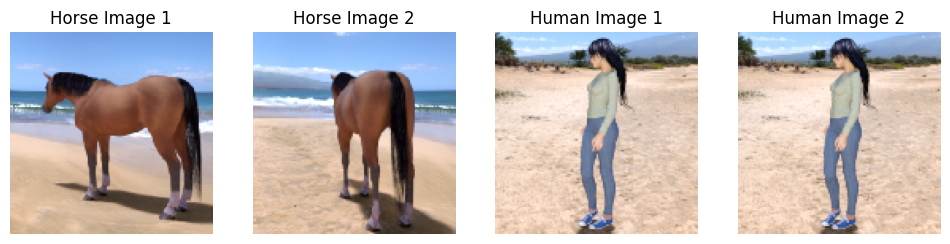

Found 1270 images belonging to 2 classes.
Epoch 1/20
 40/100 ━━━━━━━━━━━━━━━━━━━━ 1:32 2s/step - accuracy: 0.8553 - loss: 1.0299

c:\Program Files\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 764ms/step - accuracy: 0.8892 - loss: 0.6972 - val_accuracy: 0.4843 - val_loss: 571014.0000
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 755ms/step - accuracy: 0.9571 - loss: 0.1252 - val_accuracy: 0.4843 - val_loss: 47650.6445
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 742ms/step - accuracy: 0.9489 - loss: 0.1927 - val_accuracy: 0.4811 - val_loss: 0.6979
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 744ms/step - accuracy: 0.8554 - loss: 0.6826 - val_accuracy: 0.4843 - val_loss: 25805.1992
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 84s 833ms/step - accuracy: 0.9332 - loss: 0.1958 - val_accuracy: 0.4843 - val_loss: 0.7008
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 809ms/step - accuracy: 0.9730 - loss: 0.1042 - val_accuracy: 0.4843 - val_loss: 0.6951
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 778ms/step - accuracy: 0.9706 - loss: 0.0814 - val_accuracy: 0.5157 - val_loss: 0.6925
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 770ms/step - accuracy: 0.9778 - loss:

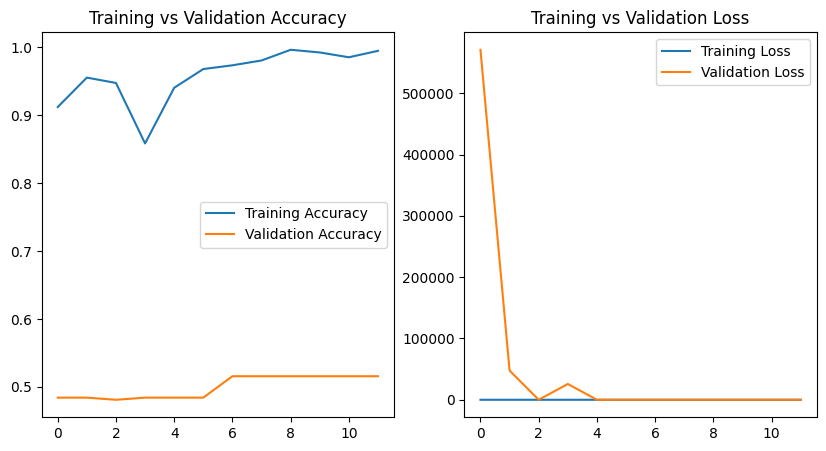

In [ ]:

base_dir = r"C:\Users\Downloads\archive\horse-or-human\h or h"


horse_dir = os.path.join(base_dir, 'horses')
human_dir = os.path.join(base_dir, 'humans')

horse_images = [os.path.join(horse_dir, f) for f in os.listdir(horse_dir)]
human_images = [os.path.join(human_dir, f) for f in os.listdir(human_dir)]


print(f"Number of horse images: {len(horse_images)}")
print(f"Number of human images: {len(human_images)}")


fig, axes = plt.subplots(1, 4, figsize=(12, 6))


for i, img_path in enumerate(horse_images[:2]):
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img)
    axes[i].imshow(img_array.astype('uint8'))
    axes[i].set_title(f"Horse Image {i+1}")
    axes[i].axis('off')


for i, img_path in enumerate(human_images[:2]):
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img)
    axes[i+2].imshow(img_array.astype('uint8'))
    axes[i+2].set_title(f"Human Image {i+1}")
    axes[i+2].axis('off')

plt.show()


datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest'
)

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(base_dir,target_size=(128, 128),batch_size=32,class_mode='binary'
)


model = Sequential([ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),Flatten(),Dense(128, activation='relu'),Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_generator,steps_per_epoch=100,epochs=20,validation_data=train_generator,validation_steps=50,callbacks=[early_stopping]
)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()
